In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Loading data and exploring data

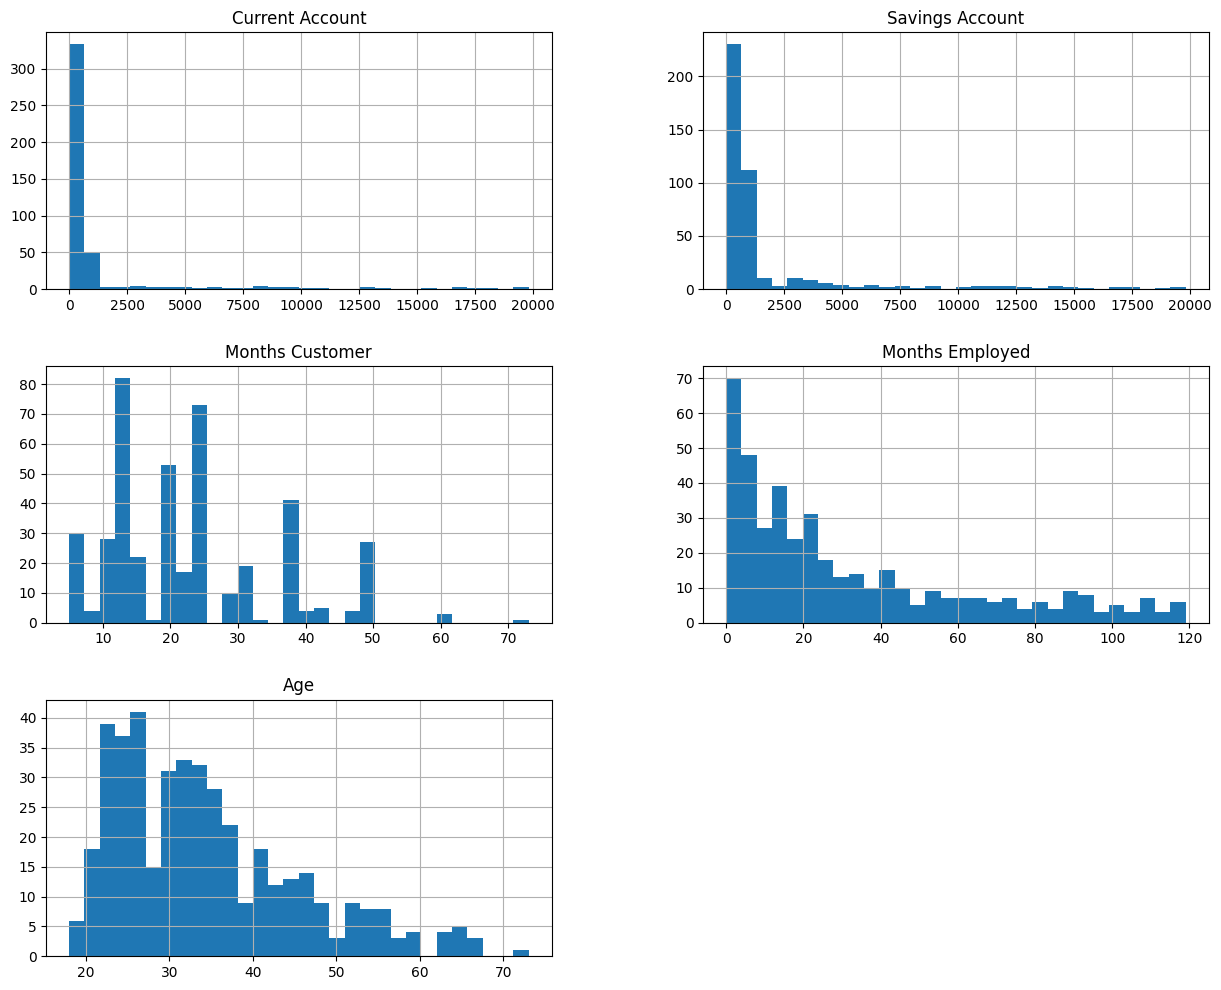

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Master Study/9. Business Analytics in Practice/Task 5 - Cluster Analysis/Unit6-Portfolio-Task-Data.xlsx')
df[['Current Account','Savings Account','Months Customer','Months Employed','Age']].hist(bins=30, figsize=(15,12))
plt.show()

# 2. Data preprocessing

In [ ]:
df['CA<1000'] = df['Current Account'].apply(lambda x: 1 if x < 1000 else 0).astype(str)
df['SA<1000'] = df['Savings Account'].apply(lambda x: 1 if x < 1000 else 0).astype(str)
df.drop(['Current Account','Savings Account'], axis=1, inplace=True)
df

,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk,CA<1000,SA<1000
0,13,12,M,Single,23,Own,Unskilled,Low,1,1
1,25,0,M,Divorced,32,Own,Skilled,High,1,0
2,19,119,M,Single,38,Own,Management,High,1,1
3,13,14,M,Single,36,Own,Unskilled,High,1,1
4,40,45,M,Single,31,Rent,Skilled,Low,1,0
...,...,...,...,...,...,...,...,...,...,...
420,7,51,M,Single,35,Other,Skilled,Low,1,1
421,31,53,M,Single,30,Own,Skilled,High,1,1
422,25,103,F,Divorced,28,Own,Skilled,High,1,1
423,16,6,F,Divorced,28,Own,Skilled,High,1,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_coder = OneHotEncoder()
cat = df.select_dtypes(exclude=np.number)
coded_cat = pd.DataFrame(cat_coder.fit_transform(cat).toarray(),
                         columns=cat_coder.get_feature_names_out())
coded_cat

,Gender_F,Gender_M,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Housing_Other,Housing_Own,Housing_Rent,Job_Management,Job_Skilled,Job_Unemployed,Job_Unskilled,Credit Risk_High,Credit Risk_Low,CA<1000_0,CA<1000_1,SA<1000_0,SA<1000_1
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
421,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
422,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
423,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num = df[['Months Customer','Months Employed','Age']]

scaled_num = pd.DataFrame(scaler.fit_transform(num),
                          columns=scaler.get_feature_names_out())
scaled_num

,Months Customer,Months Employed,Age
0,0.117647,0.100840,0.090909
1,0.294118,0.000000,0.254545
2,0.205882,1.000000,0.363636
3,0.117647,0.117647,0.327273
4,0.514706,0.378151,0.236364
...,...,...,...
420,0.029412,0.428571,0.309091
421,0.382353,0.445378,0.218182
422,0.294118,0.865546,0.181818
423,0.161765,0.050420,0.181818


In [ ]:
for i in [['CA<1000','SA<1000']]:
  coded_cat[i] = df[i]
for i in scaled_num.columns:
  coded_cat[i] = scaled_num[i]
clustered_df = coded_cat
clustered_df

,Gender_F,Gender_M,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Housing_Other,Housing_Own,Housing_Rent,Job_Management,Job_Skilled,...,Credit Risk_Low,CA<1000_0,CA<1000_1,SA<1000_0,SA<1000_1,CA<1000,SA<1000,Months Customer,Months Employed,Age
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1,1,0.117647,0.100840,0.090909
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1,0,0.294118,0.000000,0.254545
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1,1,0.205882,1.000000,0.363636
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1,1,0.117647,0.117647,0.327273
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1,0,0.514706,0.378151,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1,1,0.029412,0.428571,0.309091
421,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1,1,0.382353,0.445378,0.218182
422,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1,1,0.294118,0.865546,0.181818
423,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1,1,0.161765,0.050420,0.181818


# 3. Cluster analysis

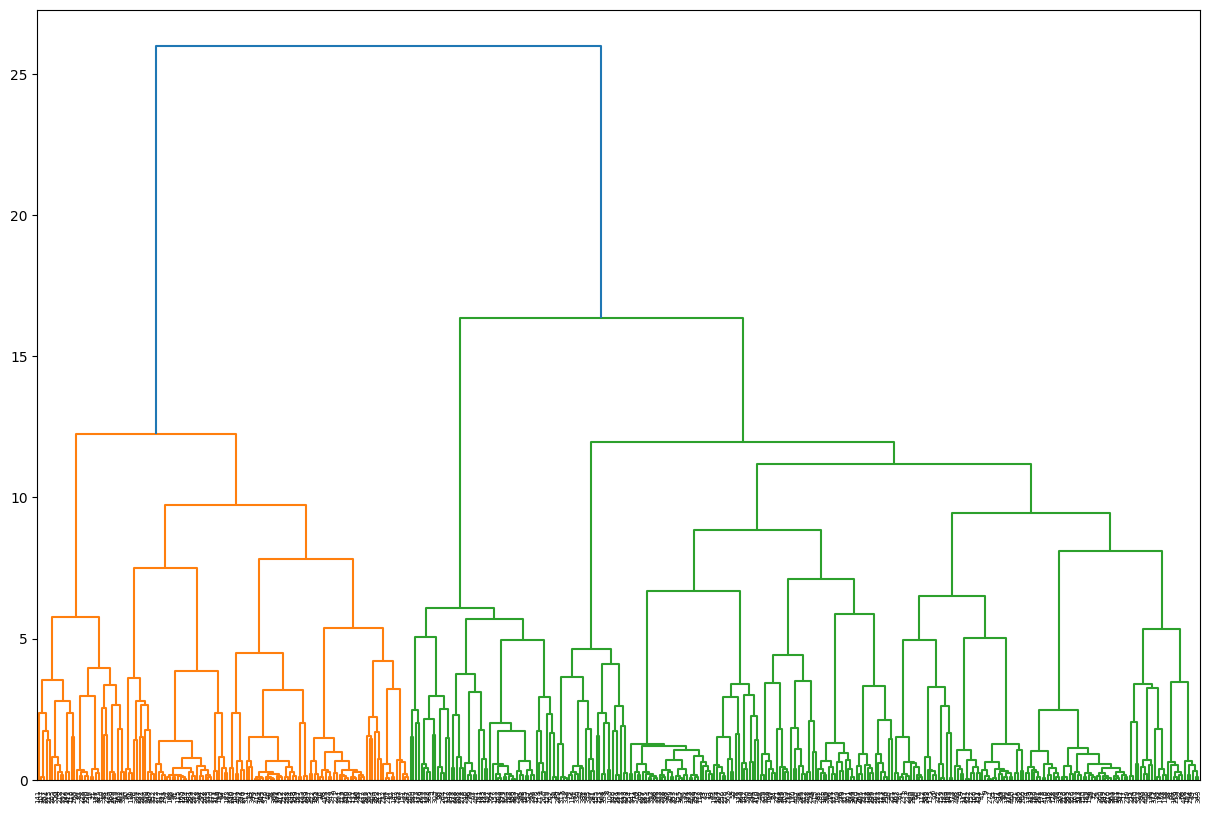

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15,10))
linkage_data = linkage(clustered_df, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

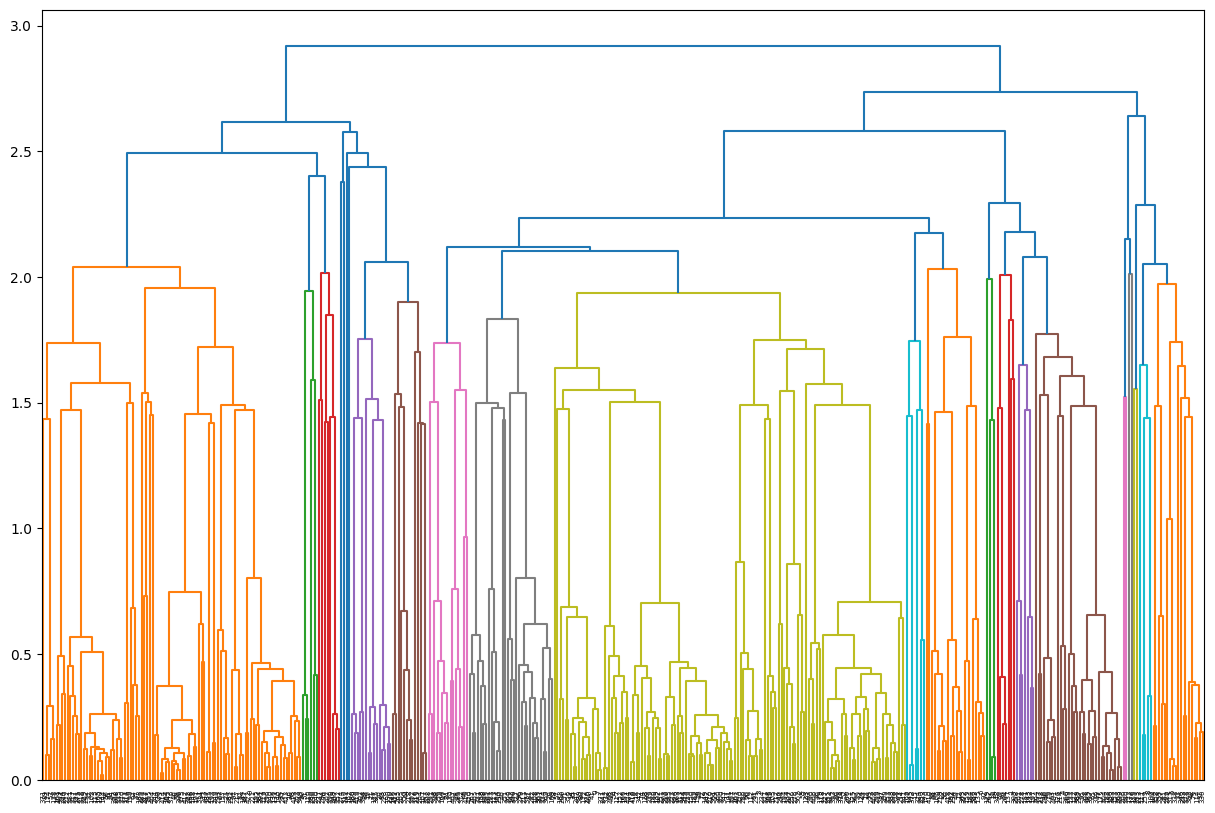

In [ ]:
plt.figure(figsize=(15,10))
linkage_data = linkage(clustered_df, method='average', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [ ]:
cat = ['Gender', 'Marital Status', 'Housing', 'Job', 'Credit Risk',
       'CA<1000', 'SA<1000']
num = ['Months Customer', 'Months Employed', 'Age']

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import chi2_contingency

lists = {}
for method in ['ward','average']:
  for clu_no in [2,3,4,5,6]:
    lists[method + '_' + str(clu_no)] = [method, clu_no]

    hierarchical_cluster = AgglomerativeClustering(n_clusters=clu_no,
                                                   metric='euclidean',
                                                   linkage=method)
    df['Cluster'] = hierarchical_cluster.fit_predict(clustered_df).astype(str)


    for i in cat:
      chi2, p_val, dof, expected = chi2_contingency(pd.crosstab(df[i],
                                                                df['Cluster']))
      lists[method + '_' + str(clu_no)].append(p_val)

col_list = ['Method','N_clusters']
for i in cat:
  col_list.append(f'{i}_Cluster')
chi_test = pd.DataFrame.from_dict(lists, orient='index', columns=col_list)
chi_test

,Method,N_clusters,Gender_Cluster,Marital Status_Cluster,Housing_Cluster,Job_Cluster,Credit Risk_Cluster,CA<1000_Cluster,SA<1000_Cluster
ward_2,ward,2,1.950306e-92,1.294319e-75,3.707377e-07,0.036436,2.239529e-02,8.430668e-01,3.029412e-01
ward_3,ward,3,5.092145e-92,1.681436e-73,1.108561e-06,0.151350,2.146618e-02,8.650389e-01,4.303613e-60
ward_4,ward,4,7.903647e-91,1.460598e-71,4.736711e-06,0.178704,5.172258e-02,8.533872e-01,8.503063e-92
ward_5,ward,5,1.018094e-89,7.086949e-70,2.598119e-05,0.225522,4.525008e-02,6.744772e-53,1.101084e-90
ward_6,ward,6,1.113190e-88,3.719766e-72,1.457634e-20,0.000523,3.627524e-12,5.694622e-52,1.210283e-89
average_2,average,2,1.064884e-87,9.814882e-80,1.922316e-06,0.030778,7.996043e-02,7.105009e-01,4.465741e-01
average_3,average,3,2.935626e-87,4.913727e-78,2.444712e-05,0.040957,9.399784e-02,4.511285e-63,4.815235e-01
average_4,average,4,4.687470e-86,1.227666e-77,8.166993e-05,0.008596,1.676571e-01,6.120279e-62,4.157274e-05
average_5,average,5,5.807603e-85,7.688590e-76,1.833177e-04,0.011937,2.813978e-01,5.364213e-61,4.875464e-37
average_6,average,6,6.182471e-84,1.513195e-74,2.475354e-04,0.029731,1.340350e-01,4.456547e-60,1.210283e-89


In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster'] = hierarchical_cluster.fit_predict(clustered_df).astype(str)
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Master Study/9. Business Analytics in Practice/Task 5 - Cluster Analysis/W3.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 df.to_csv(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
w3 = df.copy()
w3['Cluster'] = hierarchical_cluster.fit_predict(clustered_df).astype(str)
w3['Cluster'] = w3['Cluster'].apply(lambda x: '1' if x == '0' else ('2' if x == '1' else '3'))
w3

,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk,CA<1000,SA<1000,Cluster
0,13,12,M,Single,23,Own,Unskilled,Low,1,1,2
1,25,0,M,Divorced,32,Own,Skilled,High,1,0,3
2,19,119,M,Single,38,Own,Management,High,1,1,2
3,13,14,M,Single,36,Own,Unskilled,High,1,1,2
4,40,45,M,Single,31,Rent,Skilled,Low,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
420,7,51,M,Single,35,Other,Skilled,Low,1,1,2
421,31,53,M,Single,30,Own,Skilled,High,1,1,2
422,25,103,F,Divorced,28,Own,Skilled,High,1,1,1
423,16,6,F,Divorced,28,Own,Skilled,High,1,1,1


In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')
df['Cluster'] = hierarchical_cluster.fit_predict(clustered_df).astype(str)
path = '/content/drive/MyDrive/Master Study/9. Business Analytics in Practice/Task 5 - Cluster Analysis/A4.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
 df.to_csv(f)

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')
a4 = df.copy()
a4['Cluster'] = hierarchical_cluster.fit_predict(clustered_df).astype(str)
a4['Cluster'] = a4['Cluster'].apply(lambda x: '1' if x == '0'
                                    else ('2' if x == '1'
                                          else ('3' if x == '2' else '4')))
a4.head(19)

,Months Customer,Months Employed,Gender,Marital Status,Age,Housing,Job,Credit Risk,CA<1000,SA<1000,Cluster
0,13,12,M,Single,23,Own,Unskilled,Low,1,1,3
1,25,0,M,Divorced,32,Own,Skilled,High,1,0,3
2,19,119,M,Single,38,Own,Management,High,1,1,3
3,13,14,M,Single,36,Own,Unskilled,High,1,1,3
4,40,45,M,Single,31,Rent,Skilled,Low,1,0,3
5,11,13,M,Married,25,Own,Skilled,Low,0,1,2
6,13,16,M,Married,26,Own,Unskilled,Low,1,1,3
7,14,2,M,Single,27,Own,Unskilled,Low,1,1,3
8,37,9,M,Single,25,Own,Skilled,High,0,1,2
9,25,4,F,Divorced,43,Own,Skilled,High,1,1,1


# 4. Comparing two algorithms

## 4.1. Ward - 3 clusters

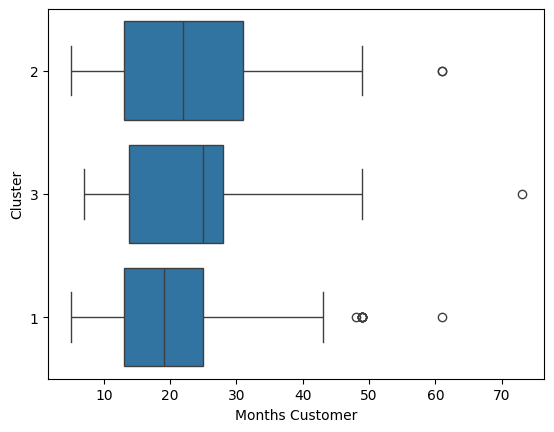

In [ ]:
sns.boxplot(data=w3, x='Months Customer', y='Cluster')
plt.show()

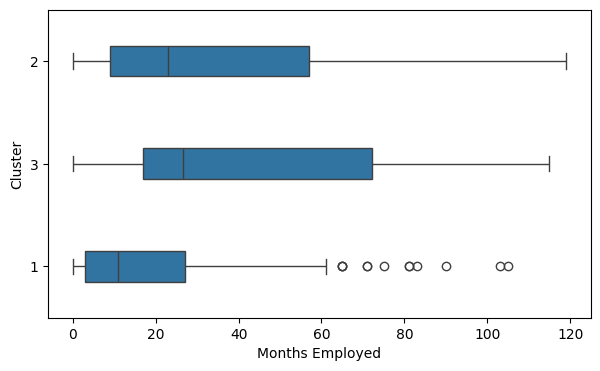

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(data=w3, x='Months Employed', y='Cluster', width=0.3)
plt.show()

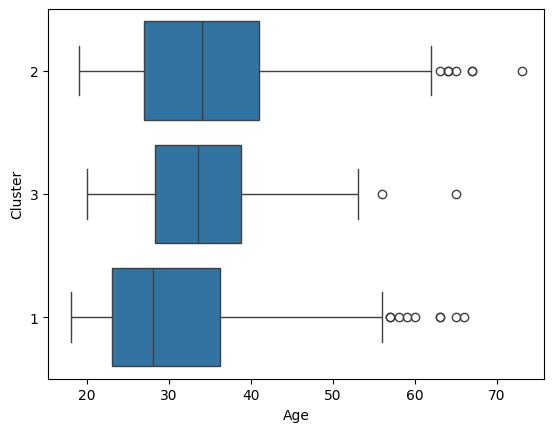

In [ ]:
sns.boxplot(data=w3, x='Age', y='Cluster')
plt.show()

## 4.2. Average - 4 clusters

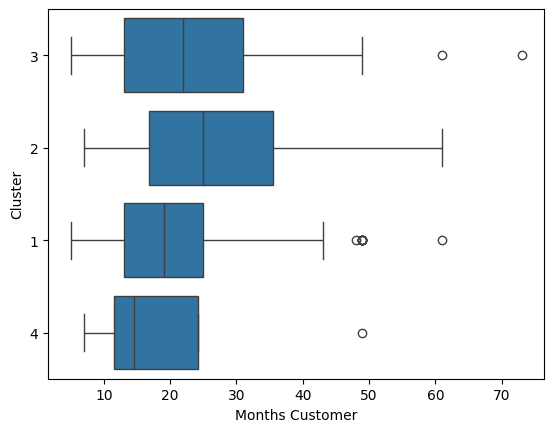

In [ ]:
sns.boxplot(data=a4, x='Months Customer', y='Cluster')
plt.show()

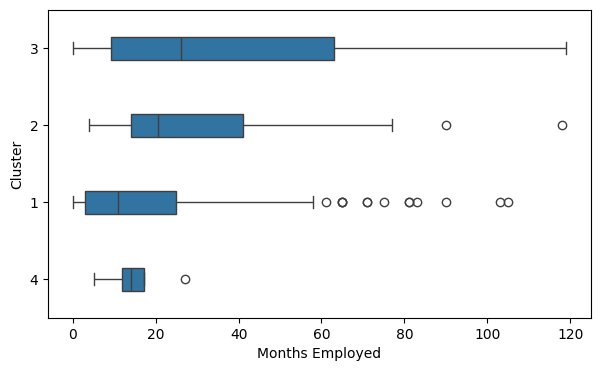

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(data=a4, x='Months Employed', y='Cluster', width=0.3)
plt.show()

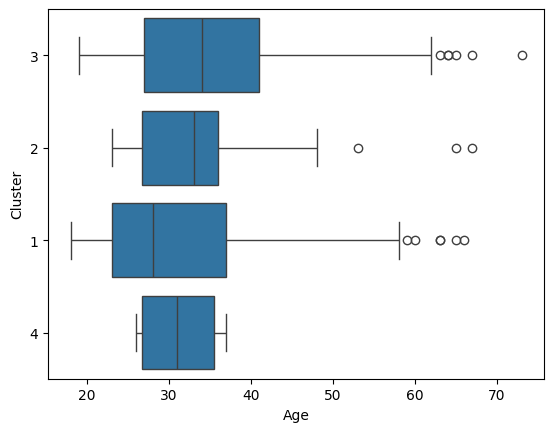

In [ ]:
sns.boxplot(data=a4, x='Age', y='Cluster')
plt.show()